## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = mouse_metadata.merge(study_results,how='outer',on='Mouse_ID')
# Display the data table for preview
merge_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21.0,16.0,0,45.0000,0
1,k403,Ramicane,Male,21.0,16.0,5,38.8259,0
2,k403,Ramicane,Male,21.0,16.0,10,35.0143,1
3,k403,Ramicane,Male,21.0,16.0,15,34.2240,1
4,k403,Ramicane,Male,21.0,16.0,20,32.9977,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9.0,30.0,25,63.1457,2
1889,z969,Naftisol,Male,9.0,30.0,30,65.8410,3
1890,z969,Naftisol,Male,9.0,30.0,35,69.1762,4
1891,z969,Naftisol,Male,9.0,30.0,40,70.3149,4


In [94]:
# Checking the number of mice.
merge_df["Mouse_ID"].count()

1893

In [134]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = merge_df.duplicated(subset=['Mouse_ID','Timepoint'],keep=False)
clean_df.value_counts()


False    1883
True       10
dtype: int64

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 

In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop_duplicates(subset=['Mouse_ID'],keep='last')
cleanest_df = cleaned_df.reset_index(drop=True)
cleanest_df = pd.DataFrame(cleanest_df)
cleanest_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21.0,16.0,45,22.0501,1
1,s185,Capomulin,Female,3.0,17.0,45,23.3436,1
2,x401,Capomulin,Female,16.0,15.0,45,28.4840,0
3,m601,Capomulin,Male,22.0,17.0,45,28.4310,1
4,g791,Ramicane,Male,11.0,16.0,45,29.1285,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21.0,28.0,5,45.9347,0
245,z435,Propriva,Female,12.0,26.0,10,48.7107,0
246,z581,Infubinol,Female,24.0,25.0,45,62.7545,3
247,z795,Naftisol,Female,13.0,29.0,45,65.7411,3


In [9]:
# Checking the number of mice in the clean DataFrame.
cleanest_df["Mouse_ID"].count()

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = cleanest_df.groupby(['Drug_Regimen'])

tumor_mean = grouped_df['Tumor_Volume_(mm3)'].mean()
tumor_median = grouped_df['Tumor_Volume_(mm3)'].median()
tumor_var = grouped_df['Tumor_Volume_(mm3)'].var()
tumor_std = grouped_df['Tumor_Volume_(mm3)'].std()
tumor_sem = grouped_df['Tumor_Volume_(mm3)'].sem()

summary_stats = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis = 1)
final_stats = summary_stats.rename(index={1: "tumor_mean", 2: "tumor_median", 3: "tumor_var"})
final_stats.head()
# Assemble the resulting series into a single summary dataframe.



,Tumor_Volume_(mm3),Tumor_Volume_(mm3),Tumor_Volume_(mm3),Tumor_Volume_(mm3),Tumor_Volume_(mm3)
Drug_Regimen,,,,,
Capomulin,36.667564,38.1252,32.663385,5.715189,1.143038
Ceftamin,57.753972,59.8520,69.982732,8.365568,1.673114
Infubinol,58.178240,60.1652,74.011005,8.602965,1.720593
Ketapril,62.806188,64.4878,98.921250,9.945916,1.989183
Naftisol,61.205760,63.2833,106.029906,10.297082,2.059416


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_stats_df = grouped_df['Tumor_Volume_(mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
summ_stats_df

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,36.667564,38.12520,32.663385,5.715189,1.143038
Ceftamin,57.753972,59.85200,69.982732,8.365568,1.673114
Infubinol,58.178240,60.16520,74.011005,8.602965,1.720593
Ketapril,62.806188,64.48780,98.921250,9.945916,1.989183
Naftisol,61.205760,63.28330,106.029906,10.297082,2.059416
Placebo,60.508412,62.03060,78.759807,8.874672,1.774934
Propriva,56.736968,55.84140,69.348954,8.327602,1.665520
Ramicane,36.191396,36.56170,32.166449,5.671547,1.134309
Stelasyn,61.001704,62.19235,90.331494,9.504288,1.940055


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

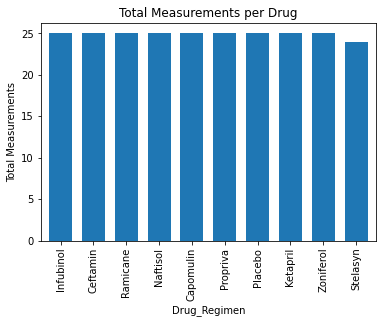

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_chart = cleanest_df['Drug_Regimen'].value_counts().plot.bar(width = 0.7, zorder = 3)

count_chart.set_xlabel('Drug_Regimen')
count_chart.set_ylabel('Total Measurements')
count_chart.set_title('Total Measurements per Drug')

plt.show


In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
df = cleanest_df.groupby('Mouse_ID')['Drug_Regimen'].sum()
df.value_counts()

#plt.bar(df, height=1000)

Infubinol    25
Ceftamin     25
Ramicane     25
Naftisol     25
Capomulin    25
Propriva     25
Placebo      25
Ketapril     25
Zoniferol    25
Stelasyn     24
Name: Drug_Regimen, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000294994489A0>],
      dtype=object)

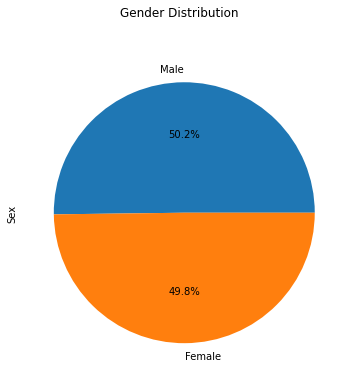

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = cleanest_df['Sex'].value_counts()
gender_pie = gender_dis.plot.pie(subplots=True, title='Gender Distribution',autopct="%1.1f%%",figsize=(6, 6))
gender_pie

([<matplotlib.patches.Wedge at 0x29498ffb1f0>,
 [Text(-0.00693917597676539, 1.0999781124353174, 'Male'),
  Text(0.0072545930666182215, -1.1499771175460136, 'Female')],
 [Text(-0.003785005078235667, 0.5999880613283548, '50.2%'),
  Text(0.00410042216808856, -0.649987066439051, '49.8%')])

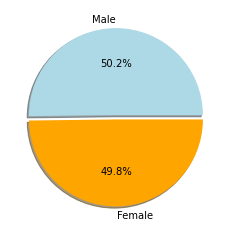

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = cleanest_df['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['lightblue','orange']
explode = (0,0.05)
plt.pie(genders, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)



## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanest_df.sample(10)

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
101,g107,Ketapril,Female,2.0,29.0,35,71.9051,0
142,m269,Stelasyn,Female,22.0,28.0,45,75.1237,1
6,f966,Capomulin,Male,16.0,17.0,20,30.4860,0
163,o813,Infubinol,Male,24.0,28.0,5,45.6993,0
117,j235,Placebo,Male,6.0,30.0,20,52.9429,1
194,t451,Stelasyn,Male,8.0,29.0,45,68.7116,1
143,m331,Zoniferol,Female,19.0,26.0,15,52.1101,1
235,x822,Ceftamin,Male,3.0,29.0,45,61.3867,3
107,g989,Propriva,Female,21.0,26.0,35,62.5709,2
203,v199,Naftisol,Female,17.0,29.0,0,45.0000,0


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in range(len(cleanest_df)):
    if  == treatments):
        tumor_vol_data.append(row[6])
    

    print(tumor_vol_data)
    # add subset 


    # Determine outliers using upper and lower bounds
#quartiles = tumor_vol_data.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of final tumor volumes is: {lowerq}")
#print(f"The upper quartile of final tumor volumes is: {upperq}")
#print(f"The interquartile range of final tumor volumes is: {iqr}")
#print(f"The the median of final tumor volumes is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

NameError: name 'i' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.set_xlim([0, 2])
#ax1.set_ylim([0, 70])
#ax1.boxplot(tumor_vol_data)
#plt.show()

## Line and Scatter Plots

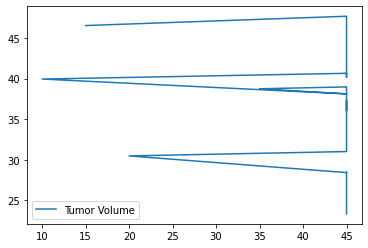

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treatment = cleanest_df.loc[cleanest_df['Drug_Regimen'] == 'Capomulin']
label='Tumor Volume'
plt.plot(treatment['Timepoint'],treatment['Tumor_Volume_(mm3)'],label=label)
plt.legend()
plt.show()

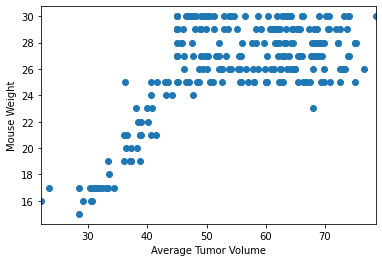

In [136]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_volume = cleanest_df.iloc[:,6]
weight = cleanest_df.iloc[:,4]

plt.scatter(tumor_volume,weight)
plt.xlim(min(tumor_volume)-.001,max(tumor_volume)+.001)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show()

## Correlation and Regression

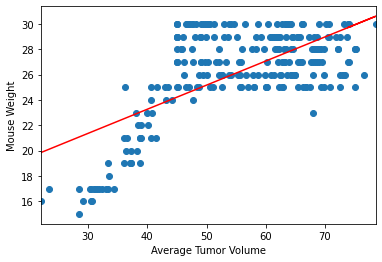

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_volume = cleanest_df.iloc[:,6]
weight = cleanest_df.iloc[:,4]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_volume,
                weight)
tv_fit = slope * weight + intercept

plt.scatter(tumor_volume,weight)
plt.xlim(min(tumor_volume)-.001,max(tumor_volume)+.001)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")

plt.plot(tumor_volume,
         [ (slope * x + intercept) for x in tumor_volume ],
        'r')

plt.show()


In [140]:
print(f"The correlation coefficient between average tumor volume and mouse weight is {round(st.pearsonr(tumor_volume,weight)[0],2)}")

The correlation coefficient between average tumor volume and mouse weight is 0.65
